In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unmessthemess/SampleData.xlsx
/kaggle/input/unmessthemess/Mess Menu.xlsx
/kaggle/input/unmessthemess/MessSample.xlsx
/kaggle/input/unmessthemess/Mess_ids.xlsx


## Data Exploration 

### Mess Menu
    Data of the Mess food schedule

In [2]:
pd.read_excel("/kaggle/input/unmessthemess/Mess Menu.xlsx", header = 2, index_col=0)

,Breakfast,Lunch,Snacks,Dinner2
Column1,,,,
Monday,1)Puri+Chana Masala 2)Pongal+Vada+Sambar+Cocon...,1)Phulka+Dhal Makahni 2)Tomato Rice +Aloo/ Gob...,Samosa +Sauce+ Tea/Coffee/Milk,1)Chapathi+Soya with Capcicum Fry 2) Rice+Andh...
Tuesday,1)Peserattu Dosa+Ginger Chutney+Sambar 2)Rava ...,1)Chapathi+Dum AlooCurry 2) Bisbilabath+Potato...,Roasted Peanut or Channa Chat+ Tea/Coffee/Milk,1)Phulka+Chettinad Egg Masala 2)Dosai Chutney ...
Wednesday,1)Poha 2)Masala Dosai+Sambar+Coconut Chutney 3...,1)Phulka+Dragon Chicken Masala 2)Veg Fried Ric...,Pani poori+ Tea/Coffee/Milk,1)Chapathi+Veg Kofta Curry 2)White Rice +Chenn...
Thursday,1)Aloo Stuffed Parathas+Curd 2)Samiya Kitchdi ...,1)Chapathi+Kadai Paneer Gravy 2)Ghee Rice 3)Wh...,Veg Sandwich+ Tea/Coffee/Milk,1)Puri+Chana Masala 2)Veg Biryani +Onion Raita...
Friday,1)Sambar Vada 2) Onion Dosa+Sambar+Coconut Chu...,1)Phulka+Dal Tadka 2)Bisbilabath +Fryums 3)Whi...,Mysore Bonda+ Tea/Coffee/Milk,1)Lacha Paratha +Phulka +Chicken Gravy 2)White...
Saturday,1)Stuffed Paneer Paratha+Tomato Chutney 2)Idly...,1)Phulka+Arabi Masala 2)Peas Pulao +Keerai Pap...,Bread Aloo Pakoda + Tea/Coffee/Milk,1)Dum Aloo Curry+Phulka 2)Veg Pulav +Raitha 3)...
Sunday,1)Pav Bhaji+Masala 2)Dosa+Vada curry+Sambar +...,1)Chapathi+Rajma Curry 2)Lemon Rice/Tamrind Ri...,Veg Burger+ Tea/Coffee/Milk,1)Chicken Briyani+Plain Chicken Gravy +Onion R...


### Mess Sample Data
    Sample data of 2 days over Breakfast and Lunch

In [3]:
pd.read_excel("/kaggle/input/unmessthemess/MessSample.xlsx",sheet_name='menu')

,Days,Breakfast
0,Monday,"Puri,Chana Masala,Vada,Sambar,Tea,Coffee,milk"
1,Tuesday,"Peserattu Dosa,Sambar,Rava upma,Tea,Coffee,Milk"


### Encoding
#### Food ID

In [4]:
pd.read_excel("/kaggle/input/unmessthemess/MessSample.xlsx",sheet_name='food_id')

,ID,Food
0,1,Puri
1,2,Chana Masala
2,3,Vada
3,4,Sambar
4,5,Tea
5,6,Coffee
6,7,Milk
7,8,Peserattu Dosa
8,9,Rava upma


#### Day ID

In [5]:
pd.read_excel("/kaggle/input/unmessthemess/MessSample.xlsx",sheet_name='day_encoding')

,Encoding,Days
0,1,Monday
1,2,Tuesday
2,3,Wednesday
3,4,Thursday
4,5,Friday
5,6,Saturday
6,7,Sunday


#### Time IDs

In [6]:
pd.read_excel("/kaggle/input/unmessthemess/MessSample.xlsx",sheet_name='time_encoding')

,Encoding,Time
0,1,Breakfast
1,2,Lunch
2,3,Snack
3,4,Dinner


## Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
data = pd.read_excel("/kaggle/input/unmessthemess/SampleData.xlsx")
data

,day,time,food_id,total,leftover
0,Monday,Breakfast,Puri,5,1.20
1,Monday,Breakfast,Puri,5,1.15
2,Monday,Breakfast,Puri,5,1.24
3,Monday,Breakfast,Puri,5,1.30
4,Monday,Breakfast,Puri,4,0.25
...,...,...,...,...,...
60,Tuesday,Breakfast,Milk,3,0.54
61,Tuesday,Breakfast,Milk,3,0.56
62,Tuesday,Breakfast,Milk,3,0.60
63,Tuesday,Breakfast,Milk,3,0.57


In [9]:
data[data["day"]=="Monday"]

,day,time,food_id,total,leftover
0,Monday,Breakfast,Puri,5,1.20
1,Monday,Breakfast,Puri,5,1.15
2,Monday,Breakfast,Puri,5,1.24
3,Monday,Breakfast,Puri,5,1.30
4,Monday,Breakfast,Puri,4,0.25
5,Monday,Breakfast,Chana Masala,7,0.80
6,Monday,Breakfast,Chana Masala,7,0.75
7,Monday,Breakfast,Chana Masala,6,-0.23
8,Monday,Breakfast,Chana Masala,6,-0.18
9,Monday,Breakfast,Chana Masala,7,0.82


<Axes: xlabel='food_id', ylabel='leftover'>

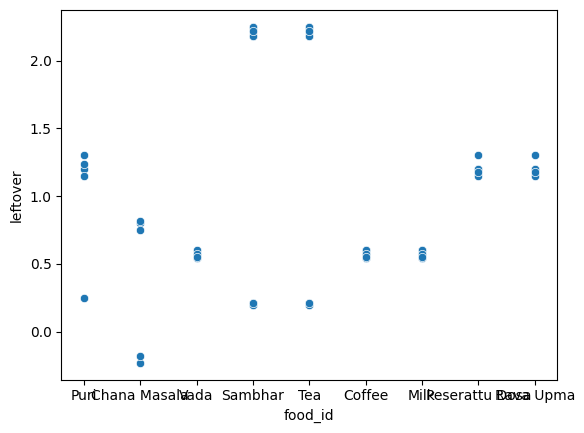

In [10]:
sns.scatterplot(x='food_id', 
                y='leftover', data=data)

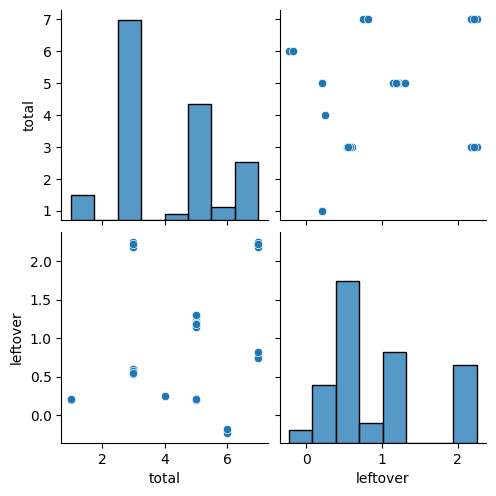

In [11]:
sns.pairplot(data)

## Encoding the dataset

In [12]:
data['day']=data['day'].replace("Monday",1)
data['day']=data['day'].replace("Tuesday",2)
data['time']=data['time'].replace("Breakfast",1)
data['food_id']=data['food_id'].replace("Puri",1)
data['food_id']=data['food_id'].replace("Chana Masala",2)
data['food_id']=data['food_id'].replace("Vada",3)
data['food_id']=data['food_id'].replace("Sambhar",4)
data['food_id']=data['food_id'].replace("Tea",5)
data['food_id']=data['food_id'].replace("Coffee",6)
data['food_id']=data['food_id'].replace("Milk",7)
data['food_id']=data['food_id'].replace("Peserattu Dosa",8)
data['food_id']=data['food_id'].replace("Rava Upma",9)


In [13]:
data.sample(10)

,day,time,food_id,total,leftover
47,2,1,9,5,1.20
60,2,1,7,3,0.54
8,1,1,2,6,-0.18
52,2,1,5,3,2.22
1,1,1,1,5,1.15
46,2,1,9,5,1.30
45,2,1,9,5,1.20
57,2,1,6,3,0.60
17,1,1,4,7,2.22
11,1,1,3,3,0.56


### Correlation Matrix

In [14]:
corr = data.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(corr, annot=True)
plt.show()

## Feature Engineering

In [15]:
data["consumption"] = data["total"] - data["leftover"]

In [16]:
data.sample(10)

,day,time,food_id,total,leftover,consumption
6,1,1,2,7,0.75,6.25
37,2,1,8,5,1.20,3.80
23,1,1,5,1,0.20,0.80
8,1,1,2,6,-0.18,6.18
3,1,1,1,5,1.30,3.70
32,1,1,7,3,0.60,2.40
56,2,1,6,3,0.56,2.44
1,1,1,1,5,1.15,3.85
36,2,1,8,5,1.30,3.70
46,2,1,9,5,1.30,3.70


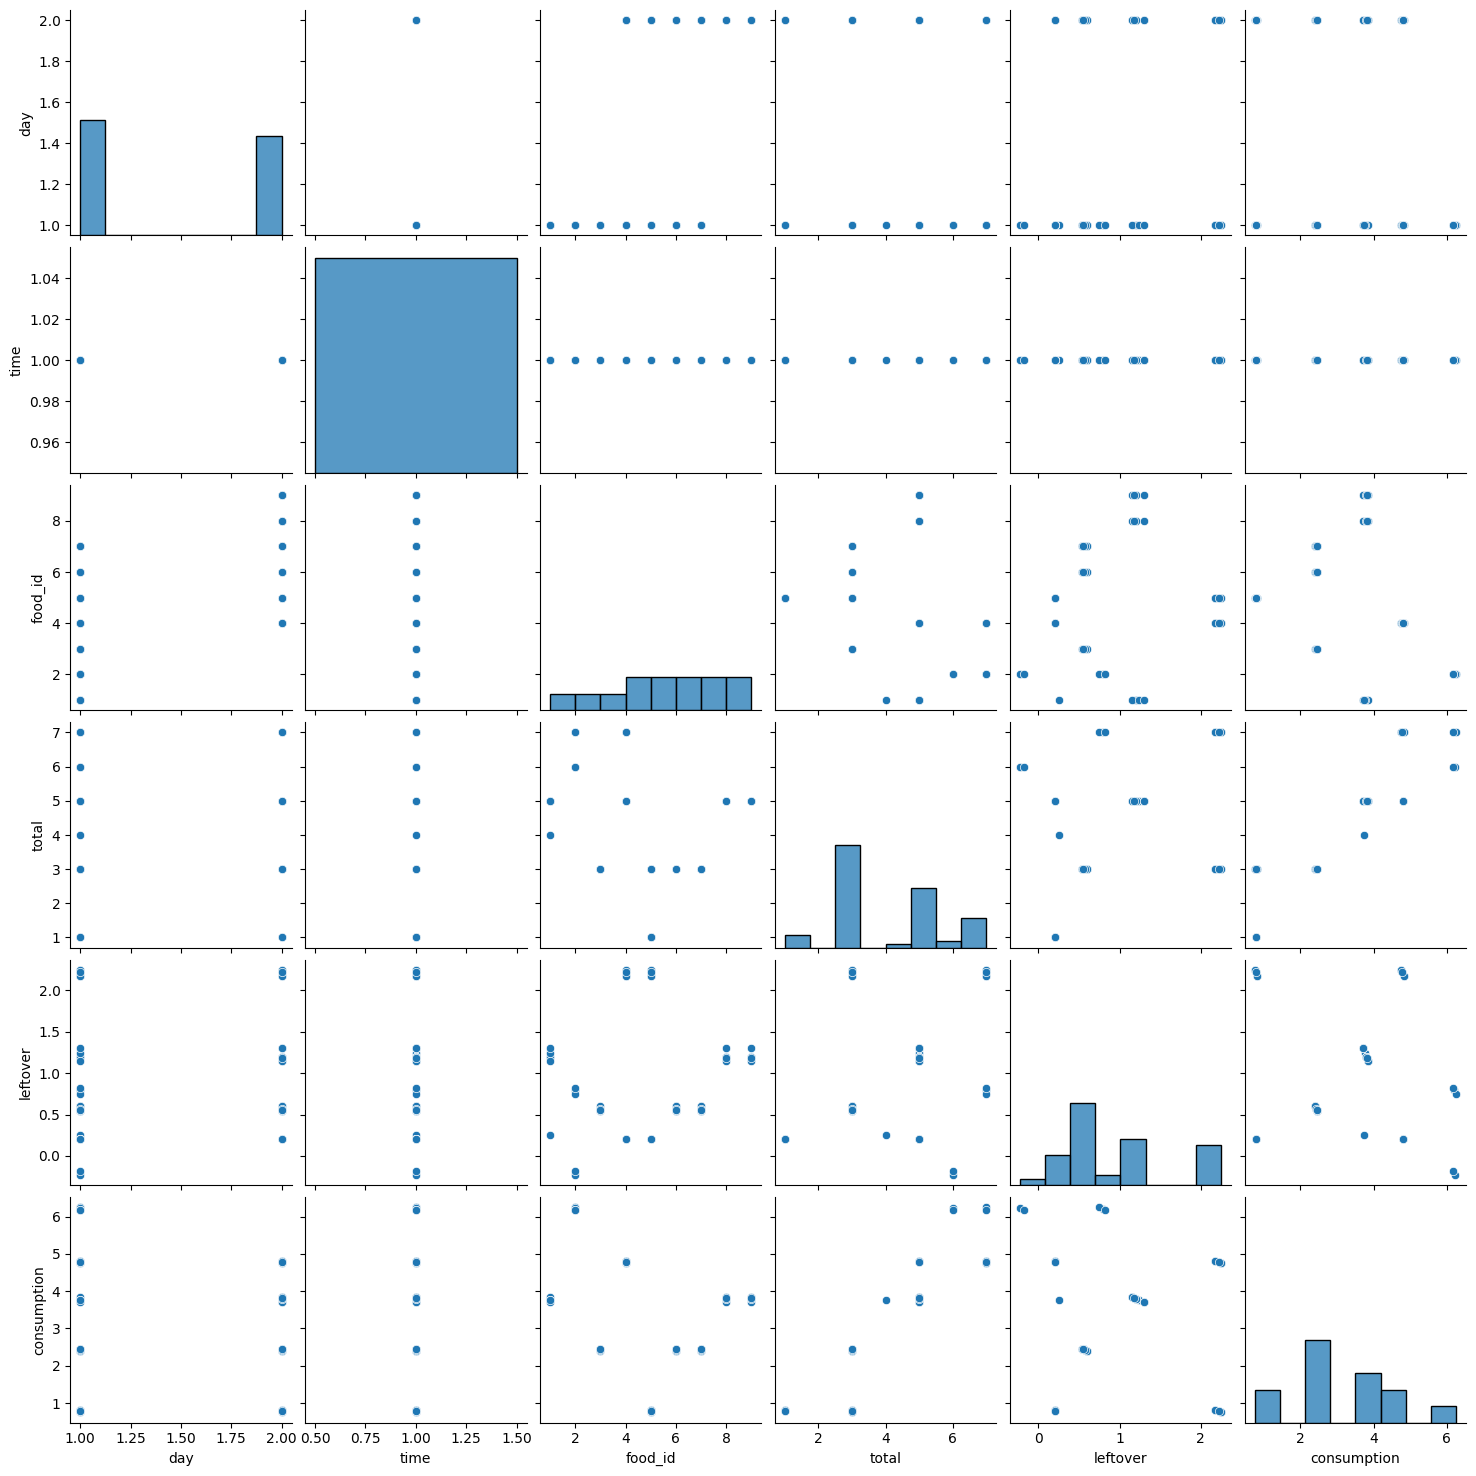

In [18]:
sns.pairplot(data)

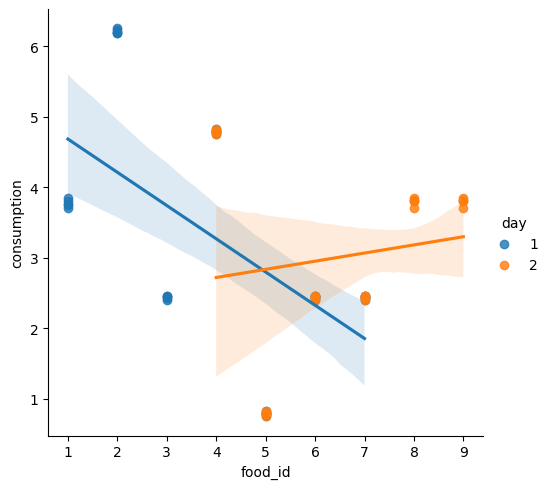

In [17]:
sns.lmplot(x="food_id", y="consumption", hue="day", data=data)

## Creating X,y

In [19]:
y = data["consumption"]
y

0     3.80
1     3.85
2     3.76
3     3.70
4     3.75
      ... 
60    2.46
61    2.44
62    2.40
63    2.43
64    2.45
Name: consumption, Length: 65, dtype: float64

In [20]:
x = data.drop(columns=["consumption","total","leftover"], axis=1)
x

,day,time,food_id
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
60,2,1,7
61,2,1,7
62,2,1,7
63,2,1,7


# MODEL Training
#### Split dataset into test and train

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=100)

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

#### Model creation

In [23]:
model = LinearRegression()

#### Model fitting

In [24]:
model.fit(X_train,y_train)

LinearRegression()

#### Predicting

In [25]:
predictions = model.predict(X_test) 
predictions


array([3.48504179, 2.57457938, 3.31229035, 3.1161863 , 3.1161863 ,
       2.75900712, 2.57457938, 3.49671809, 3.31229035, 2.93175856,
       3.68114584, 3.12786261, 3.49671809])

### Model Evaluation

In [26]:
print( 
'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 


mean_squared_error :  1.72436693347104
mean_absolute_error :  0.9891839478141322


In [27]:
#[day,time,food_id]
A = [2,1,5]

In [28]:
model.predict([A])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.30061405])